In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('/Users/fionafei/Desktop/Chicago/WIN22/Linear and Non-Linear Models/Assignment2/Sample Code')
import Regression
from scipy.special import loggamma
from scipy.stats import norm
from scipy.stats import chi2

In [2]:
df = pd.read_csv("claim_history.csv")

In [3]:
trainData = df[['KIDSDRIV', 'HOMEKIDS', 'TRAVTIME', 'MSTATUS', 'TIF', 'CAR_TYPE', 
         'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY', 'CLM_COUNT', 'EXPOSURE']].dropna()


In [4]:
y = trainData['CLM_COUNT']
x = trainData['EXPOSURE']
logX = np.log(trainData['EXPOSURE'])

In [5]:
trainData.head()

,KIDSDRIV,HOMEKIDS,TRAVTIME,MSTATUS,TIF,CAR_TYPE,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,CLM_COUNT,EXPOSURE
0,0,0,14,No,11,Minivan,No,3,18.0,Highly Urban/ Urban,0,0.189
1,0,0,22,No,1,Minivan,No,0,1.0,Highly Urban/ Urban,0,1.000
2,0,0,26,No,1,Van,No,2,10.0,Highly Urban/ Urban,0,1.000
3,0,1,5,Yes,4,SUV,No,3,10.0,Highly Urban/ Urban,0,0.828
4,0,0,32,Yes,7,Minivan,No,0,6.0,Highly Urban/ Urban,0,0.729


In [6]:
# Set some options for printing all the columns
np.set_printoptions(precision = 10, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('precision', 10)

pd.options.display.float_format = '{:,.7e}'.format

## Question 1 (20 points)

### a)	(20 points) For each predictor, generate a scatterplot chart that shows the number of claims by the predictor’s values.  Also, color-code the markers by the exposure values.  Please display the predictor’s values are displayed in ascending lexical order.

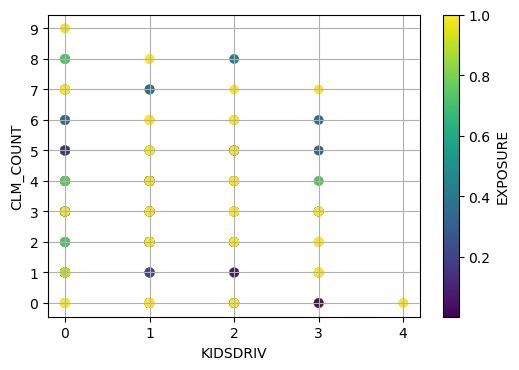

In [7]:
# KIDSDRIV
y = trainData['CLM_COUNT']
x = trainData['KIDSDRIV'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('KIDSDRIV')
plt.ylabel('CLM_COUNT')
plt.xticks(range(5))
plt.yticks(range(10))
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

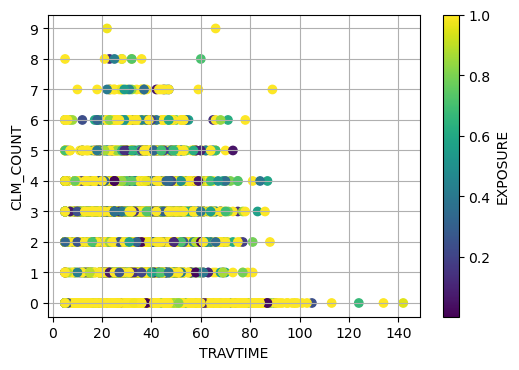

In [8]:
# TRAVTIME
y = trainData['CLM_COUNT']
x = trainData['TRAVTIME'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('TRAVTIME')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks(range(10))
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()



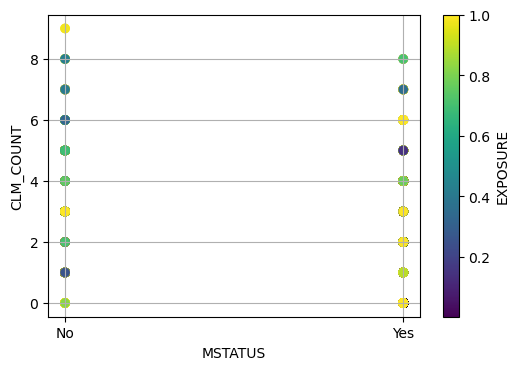

In [9]:
# MSTATUS
y = trainData['CLM_COUNT']
x = trainData['MSTATUS'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('MSTATUS')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()


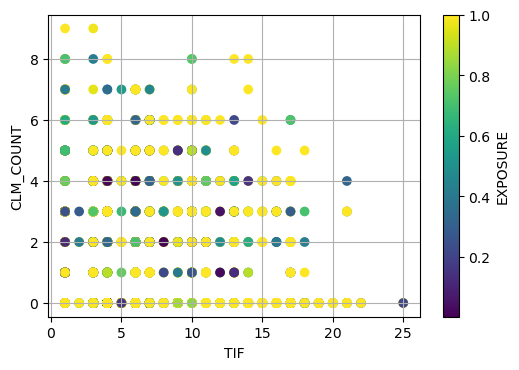

In [10]:
# TIF
y = trainData['CLM_COUNT']
x = trainData['TIF'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('TIF')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

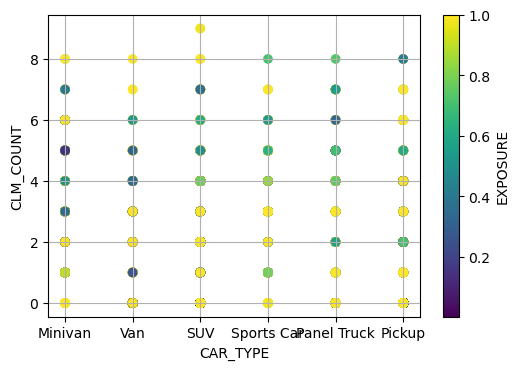

In [11]:
# CAR_TYPE
y = trainData['CLM_COUNT']
x = trainData['CAR_TYPE'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('CAR_TYPE')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

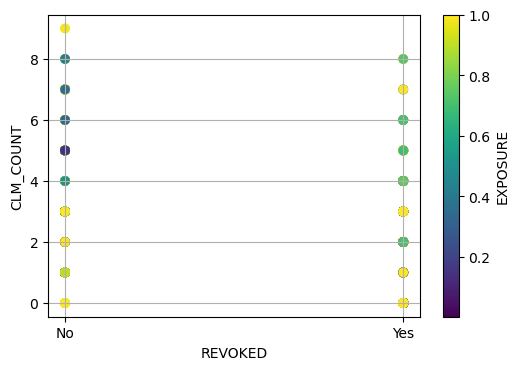

In [12]:
# REVOKED
y = trainData['CLM_COUNT']
x = trainData['REVOKED'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('REVOKED')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

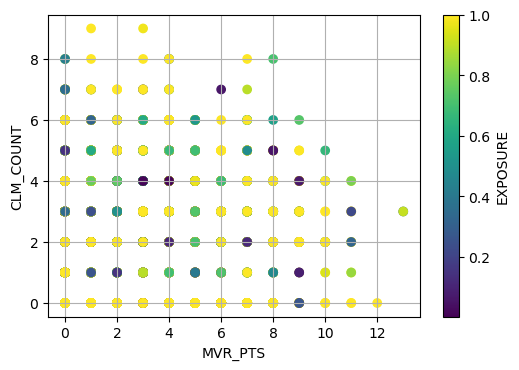

In [13]:
# MVR_PTS
y = trainData['CLM_COUNT']
x = trainData['MVR_PTS'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('MVR_PTS')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

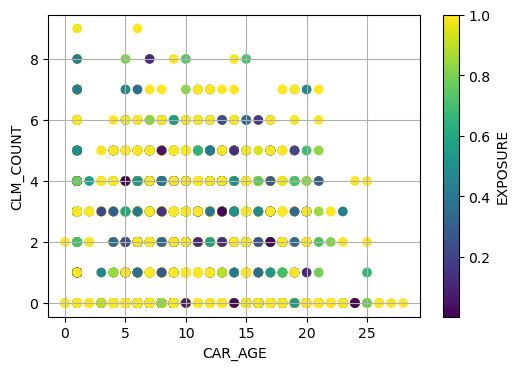

In [14]:
#CAR_AGE
y = trainData['CLM_COUNT']
x = trainData['CAR_AGE'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('CAR_AGE')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

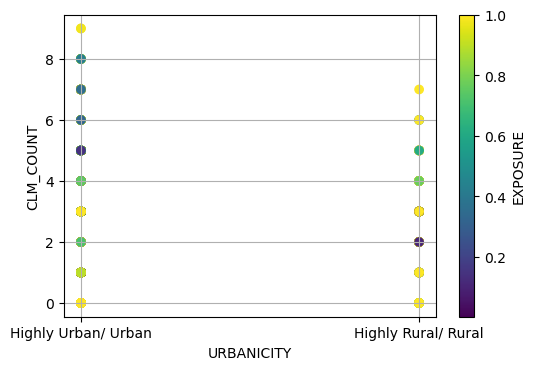

In [15]:
# URBANICITY
y = trainData['CLM_COUNT']
x = trainData['URBANICITY'].astype('category')
plt.figure(dpi = 100)
scatter = plt.scatter(x, y, c = trainData.EXPOSURE)
plt.xlabel('URBANICITY')
plt.ylabel('CLM_COUNT')
plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

## Question 2 (40 points)

### Enter the predictors into your model using Forward Selection.  The Entry Threshold is 0.05.
### a)	(15 points).  Please provide a summary report of the Forward Selection. The report should include (1) the step number, (2) the predictor entered, (3) the number of non-aliased parameters in the current model, (4) the log-likelihood value of the current model, (5) the Deviance Chi-squares statistic between the current and the previous models, (6) the corresponding Deviance Degree of Freedom, and (7) the corresponding Chi-square significance.


In [16]:
# Intercept only model

X_train = trainData[['CLM_COUNT']].copy()
X_train.insert(0, 'Intercept', 1.0)
X_train.drop(columns = ['CLM_COUNT'], inplace = True)

y_train = trainData['CLM_COUNT']
e_train = trainData['EXPOSURE']
o_train = np.log(trainData['EXPOSURE'])

step_summary = pd.DataFrame()

outList = Regression.PoissonModel(X_train, y_train, o_train)
llk_0 = outList[3]
df_0 = len(outList[4])
step_summary = step_summary.append([['Intercept', df_0, llk_0, np.nan, np.nan, np.nan]], ignore_index = True)



In [17]:
# Find the first predictor
step_detail = pd.DataFrame()

car_type = trainData[['CAR_TYPE']].astype('category')
term_car_type = pd.get_dummies(car_type)

mstatus = trainData[['MSTATUS']].astype('category')
term_mstatus = pd.get_dummies(mstatus, drop_first=True)

revoked = trainData[['REVOKED']].astype('category')
term_revoked = pd.get_dummies(revoked, drop_first=True)

urban = trainData[['URBANICITY']].astype('category')
term_urban = pd.get_dummies(urban, drop_first=True)

In [18]:
# Find the first predictor
step_detail = pd.DataFrame()

# Try Intercept + KIDSDRIV
X = X_train.join(trainData[['KIDSDRIV']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
    
# Try Intercept + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MSTATUS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + MVR_PTS
X = X_train.join(trainData[['MVR_PTS']]) 
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + CAR_AGE
X = X_train.join(trainData[["CAR_AGE"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_AGE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)



# Try Intercept + URBAN
X = X_train.join(term_urban)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ URBANICITY', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)



In [19]:
# Find the first predictor
step_detail

,0,1,2,3,4,5
0,+ KIDSDRIV,2,-1.7209684e+04,2.2946760e+02,1,7.7884619e-52
1,+ HOMEKIDS,2,-1.7168230e+04,3.1237428e+02,1,6.6375895e-70
2,+ TRAVTIME,2,-1.7285968e+04,7.6900009e+01,1,1.7983635e-18
3,+ MSTATUS,2,-1.7138676e+04,3.7148307e+02,1,8.8978669e-83
4,+ TIF,2,-1.7249465e+04,1.4990488e+02,1,1.8186579e-34
5,+ CAR_TYPE,6,-1.7117143e+04,4.1454849e+02,5,2.1690060e-87
6,+ REVOKED,2,-1.7087785e+04,4.7326491e+02,1,6.2417433e-105
7,+ MVR_PTS,2,-1.6816770e+04,1.0152957e+03,1,8.5025203e-223
8,+ CAR_AGE,2,-1.7170782e+04,3.0727097e+02,1,8.5848521e-69
9,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1,0.0000000e+00


In [20]:
# Based on the step_detail table above, Intercept + URBANICITY has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY

row = step_detail[step_detail[0] == '+ URBANICITY']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_urban)



In [21]:
# Find the second predictor
step_detail = pd.DataFrame()


# Try Intercept + URBANICITY + KIDSDRIV
X = X_train.join(trainData[['KIDSDRIV']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
    
# Try Intercept + URBANICITY + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MSTATUS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS
X = X_train.join(trainData[['MVR_PTS']]) 
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MVR_PTS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + CAR_AGE
X = X_train.join(trainData[["CAR_AGE"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_AGE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)



In [22]:
# Find the second predictor
step_detail

,0,1,2,3,4,5
0,+ KIDSDRIV,3,-1.6341902e+04,2.7800065e+02,1,2.0478305e-62
1,+ HOMEKIDS,3,-1.6285360e+04,3.9108366e+02,1,4.8079930e-87
2,+ TRAVTIME,3,-1.6364951e+04,2.3190220e+02,1,2.2935630e-52
3,+ MSTATUS,3,-1.6293921e+04,3.7396190e+02,1,2.5678957e-83
4,+ TIF,3,-1.6401737e+04,1.5833090e+02,1,2.6202162e-36
5,+ CAR_TYPE,7,-1.6240861e+04,4.8008250e+02,5,1.5882329e-101
6,+ REVOKED,3,-1.6306860e+04,3.4808329e+02,1,1.1079845e-77
7,+ MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1,1.1348123e-153
8,+ CAR_AGE,3,-1.6200237e+04,5.6132939e+02,1,4.3194961e-124


In [24]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS

row = step_detail[step_detail[0] == '+ MVR_PTS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(trainData[['MVR_PTS']])

In [25]:
# Find the third predictor
step_detail = pd.DataFrame()


# Try Intercept + URBANICITY + MVR_PTS + KIDSDRIV
X = X_train.join(trainData[['KIDSDRIV']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
    
# Try Intercept + URBANICITY + MVR_PTS + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MSTATUS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE
X = X_train.join(trainData[["CAR_AGE"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_AGE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


In [26]:
# Find the third predictor
step_detail

,0,1,2,3,4,5
0,+ KIDSDRIV,4,-1.6021390e+04,2.2168679e+02,1,3.8766688e-50
1,+ HOMEKIDS,4,-1.5982629e+04,2.9921031e+02,1,4.8957574e-67
2,+ TRAVTIME,4,-1.6034452e+04,1.9556367e+02,1,1.9408438e-44
3,+ MSTATUS,4,-1.5975215e+04,3.1403717e+02,1,2.8825236e-70
4,+ TIF,4,-1.6062675e+04,1.3911847e+02,1,4.1494372e-32
5,+ CAR_TYPE,8,-1.5932299e+04,3.9987010e+02,5,3.1641902e-84
6,+ REVOKED,4,-1.5975839e+04,3.1278936e+02,1,5.3900256e-70
7,+ CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1,6.9691259e-104


In [27]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE

row = step_detail[step_detail[0] == '+ CAR_AGE']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(trainData[['CAR_AGE']])

In [29]:
# Find the fourth predictor
step_detail = pd.DataFrame()


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + KIDSDRIV
X = X_train.join(trainData[['KIDSDRIV']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
    
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS
X = X_train.join(term_mstatus)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ MSTATUS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


In [30]:
# Find the fourth predictor
step_detail

,0,1,2,3,4,5
0,+ KIDSDRIV,5,-1.5800253e+04,1.9551138e+02,1,1.9925214e-44
1,+ HOMEKIDS,5,-1.5800190e+04,1.9563899e+02,1,1.8687564e-44
2,+ TRAVTIME,5,-1.5799473e+04,1.9707190e+02,1,9.0956166e-45
3,+ MSTATUS,5,-1.5720053e+04,3.5591160e+02,1,2.1869339e-79
4,+ TIF,5,-1.5831659e+04,1.3269945e+02,1,1.0518942e-30
5,+ CAR_TYPE,9,-1.5722310e+04,3.5139907e+02,5,8.7474772e-74
6,+ REVOKED,5,-1.5752249e+04,2.9152012e+02,1,2.3192087e-65


In [31]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS

row = step_detail[step_detail[0] == '+ MSTATUS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_mstatus)

In [32]:
# Find the fifth predictor
step_detail = pd.DataFrame()


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + KIDSDRIV
X = X_train.join(trainData[['KIDSDRIV']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
    
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE
X = X_train.join(term_car_type)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ CAR_TYPE', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


In [33]:
# Find the fifth predictor
step_detail

,0,1,2,3,4,5
0,+ KIDSDRIV,6,-1.5608020e+04,2.2406729e+02,1,1.1728448e-50
1,+ HOMEKIDS,6,-1.5603268e+04,2.3357106e+02,1,9.9215317e-53
2,+ TRAVTIME,6,-1.5619911e+04,2.0028380e+02,1,1.8109281e-45
3,+ TIF,6,-1.5650360e+04,1.3938719e+02,1,3.6242851e-32
4,+ CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5,5.0584841e-76
5,+ REVOKED,6,-1.5581687e+04,2.7673236e+02,1,3.8697696e-62


In [34]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE 

row = step_detail[step_detail[0] == '+ CAR_TYPE']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_car_type)

# Find the fifth predictor
step_detail = pd.DataFrame()


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + KIDSDRIV
X = X_train.join(trainData[['KIDSDRIV']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
    
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED
X = X_train.join(term_revoked)
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ REVOKED', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)



In [35]:
# Find the sixth predictor
step_detail

,0,1,2,3,4,5
0,+ KIDSDRIV,11,-1.5423807e+04,2.3070133e+02,1,4.1917451e-52
1,+ HOMEKIDS,11,-1.5427671e+04,2.2297366e+02,1,2.0312906e-50
2,+ TRAVTIME,11,-1.5437587e+04,2.0314091e+02,1,4.3096304e-46
3,+ TIF,11,-1.5467611e+04,1.4309284e+02,1,5.6096135e-33
4,+ REVOKED,11,-1.5403153e+04,2.7200815e+02,1,4.1423638e-61


In [37]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED

row = step_detail[step_detail[0] == '+ REVOKED']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(term_revoked)

# Find the sixth predictor
step_detail = pd.DataFrame()


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV
X = X_train.join(trainData[['KIDSDRIV']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ KIDSDRIV', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)
    
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


In [41]:
# Find the seventh(7) predictor
step_detail

,0,1,2,3,4,5
0,+ KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1,3.3934421e-47
1,+ HOMEKIDS,12,-1.5302473e+04,2.0136027e+02,1,1.0543743e-45
2,+ TRAVTIME,12,-1.5305349e+04,1.9560842e+02,1,1.8976928e-44
3,+ TIF,12,-1.5339027e+04,1.2825350e+02,1,9.8784436e-30


In [43]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV

row = step_detail[step_detail[0] == '+ KIDSDRIV']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(trainData[['KIDSDRIV']])

# Find the seventh(7) predictor
step_detail = pd.DataFrame()

    
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)

# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME
X = X_train.join(trainData[['TRAVTIME']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TRAVTIME', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


In [44]:
# Find the 8th predictor
step_detail

,0,1,2,3,4,5
0,+ HOMEKIDS,13,-1.5261996e+04,7.4114833e+01,1,7.3702435e-18
1,+ TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1,4.2649355e-44
2,+ TIF,13,-1.5238763e+04,1.2058167e+02,1,4.7183874e-28


In [45]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME

row = step_detail[step_detail[0] == '+ TRAVTIME']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(trainData[['TRAVTIME']])

# Find the 8th predictor
step_detail = pd.DataFrame()

    
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF
X = X_train.join(trainData[['TIF']])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ TIF', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


In [46]:
# Find the 9th predictor
step_detail

,0,1,2,3,4,5
0,+ HOMEKIDS,14,-1.5160473e+04,8.3163802e+01,1,7.5528183e-20
1,+ TIF,14,-1.5145287e+04,1.1353589e+02,1,1.6467361e-26


In [47]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF

row = step_detail[step_detail[0] == '+ TIF']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(trainData[['TIF']])

# Find the 9th predictor
step_detail = pd.DataFrame()

    
# Try Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS
X = X_train.join(trainData[["HOMEKIDS"]])
outList = Regression.PoissonModel(X, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

deviance_chisq = 2 * (llk_1 - llk_0)
deviance_df = df_1 - df_0
deviance_sig = chi2.sf(deviance_chisq, deviance_df)
step_detail = step_detail.append([['+ HOMEKIDS', df_1, llk_1, deviance_chisq, deviance_df, deviance_sig]], ignore_index = True)


In [48]:
# Find the 10th predictor
step_detail

,0,1,2,3,4,5
0,+ HOMEKIDS,15,-1.5102010e+04,8.6553304e+01,1,1.3602126e-20


In [49]:
# Based on the step_detail table above, Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS has the lowest deviance significance value. 
# We then update the current model to Intercept + URBANICITY + MVR_PTS + CAR_AGE + MSTATUS + CAR_TYPE + REVOKED + KIDSDRIV + TRAVTIME + TIF + HOMEKIDS 

row = step_detail[step_detail[0] == '+ HOMEKIDS']
llk_0 = row.iloc[0][2]
df_0 = row.iloc[0][1]
step_summary = step_summary.append(row, ignore_index = True)
X_train = X_train.join(trainData[['HOMEKIDS']])



In [50]:
step_summary

,0,1,2,3,4,5
0,Intercept,1,-1.7324418e+04,nan,nan,nan
1,+ URBANICITY,2,-1.6480902e+04,1.6870313e+03,1.0000000e+00,0.0000000e+00
2,+ MVR_PTS,3,-1.6132234e+04,6.9733640e+02,1.0000000e+00,1.1348123e-153
3,+ CAR_AGE,4,-1.5898009e+04,4.6844946e+02,1.0000000e+00,6.9691259e-104
4,+ MSTATUS,5,-1.5720053e+04,3.5591160e+02,1.0000000e+00,2.1869339e-79
5,+ CAR_TYPE,10,-1.5539157e+04,3.6179176e+02,5.0000000e+00,5.0584841e-76
6,+ REVOKED,11,-1.5403153e+04,2.7200815e+02,1.0000000e+00,4.1423638e-61
7,+ KIDSDRIV,12,-1.5299053e+04,2.0819974e+02,1.0000000e+00,3.3934421e-47
8,+ TRAVTIME,13,-1.5202055e+04,1.9399703e+02,1.0000000e+00,4.2649355e-44
9,+ TIF,14,-1.5145287e+04,1.1353589e+02,1.0000000e+00,1.6467361e-26


### b)	(5 points).  What predictors does your final model contain?

The final model contains all predictors.

### c)	(5 points).  What are the aliased parameters in your final model?  Please list the predictor’s name and the aliased categories.

In [ ]:
URBANICITY, MSTATUS, REVOKED, MVR_PTS

### d)	(5 points).  How many non-aliased parameters are in your final model?

There is no non-aliased parameters in my final model.

### e)	(10 points).  Please show a table of the complete set of parameters of your final model (including the aliased parameters).  Besides the parameter estimates, please also include the standard errors, and the 95% asymptotic confidence intervals.  Conventionally, aliased parameters have missing standard errors and confidence intervals.

In [52]:
X_interval = trainData[['CAR_AGE', 'MVR_PTS', 'TIF', 'TRAVTIME']]
kidsdriv = trainData[['KIDSDRIV']]
homekids = trainData[['HOMEKIDS']]
X_train = pd.concat([X_interval, term_urban,term_mstatus,term_revoked,term_car_type, kidsdriv, homekids],axis=1)
X_train.insert(0, 'Intercept', 1.0)


outList = Regression.PoissonModel(X_train, y_train, o_train)
llk_1 = outList[3]
df_1 = len(outList[4])

In [55]:
outList[0]

,Estimate,Standard Error,Lower 95% CI,Upper 95% CI,Exponentiated
Intercept,-1.5984711e+00,7.5174699e-02,-1.7458108e+00,-1.4511314e+00,2.0220544e-01
CAR_AGE,-3.9573491e-02,2.1044246e-03,-4.3698088e-02,-3.5448895e-02,9.6119931e-01
MVR_PTS,8.7009883e-02,4.4357124e-03,7.8316047e-02,9.5703720e-02,1.0909075e+00
TIF,-3.1315006e-02,2.9534848e-03,-3.7103730e-02,-2.5526282e-02,9.6917023e-01
TRAVTIME,1.0231442e-02,7.2432061e-04,8.8117994e-03,1.1651084e-02,1.0102840e+00
URBANICITY_Highly Urban/ Urban,1.7758313e+00,5.4677121e-02,1.6686661e+00,1.8829965e+00,5.9051880e+00
MSTATUS_Yes,-4.5935083e-01,2.2857571e-02,-5.0415085e-01,-4.1455082e-01,6.3169359e-01
REVOKED_Yes,4.3719893e-01,2.8261101e-02,3.8180819e-01,4.9258967e-01,1.5483641e+00
CAR_TYPE_Minivan,-4.5182532e-01,4.6445445e-02,-5.4285672e-01,-3.6079392e-01,6.3646534e-01
CAR_TYPE_Panel Truck,5.8096495e-02,5.3966062e-02,-4.7675043e-02,1.6386803e-01,1.0598173e+00


## Question 3 (20 points)

### You will visually assess your final model in Question 2.  Please color-code the markers according to the Exposure value.

### a)	(10 points).  Please plot the predicted number of claims versus the observed number of claims.

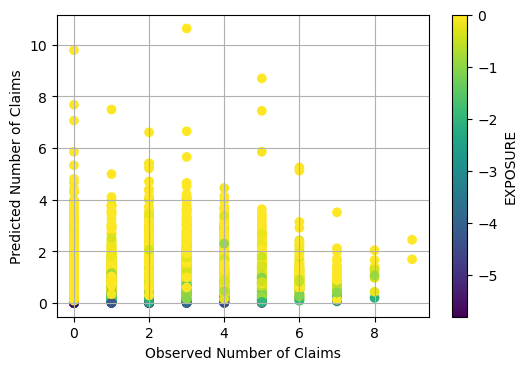

In [57]:

y_pred = outList[6]
plt.figure(dpi = 100)
scatter = plt.scatter(y_train, y_pred, c = o_train)
plt.xlabel('Observed Number of Claims')
plt.ylabel('Predicted Number of Claims')

plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

### b)	(10 points).  Please plot the Deviance residuals versus the observed number of claims.

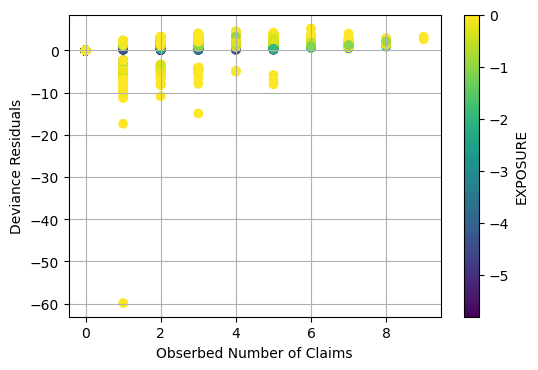

In [59]:
r2 =y_train * np.exp(y_pred / y_train) - (y_train - y_pred)
risid = np.where(y_train > y_pred, 1.0, -1.0) * np.where(r2 > 0.0, np.sqrt(2.0 * r2), 0.0)

plt.figure(dpi = 100)
scatter = plt.scatter(y_train, risid, c = o_train)
plt.xlabel('Obserbed Number of Claims')
plt.ylabel('Deviance Residuals')

plt.xticks()
plt.yticks()
plt.grid(axis = 'both')
cbar = plt.colorbar(scatter)
cbar.set_label('EXPOSURE')
plt.show()

## Question 4 (20 points)

### You will calculate the Accuracy metric to assess your final model in Question 2.
### a)	(10 points). Please calculate the Root Mean Squared Error, the Relative Error, and the R-squared metrics.


In [62]:
# Root mean squared error

y_res = y_train - y_pred
sumRes = np.sum(y_res)
n = len(y_train)
rmse = np.sqrt(np.sum(np.power(y_res, 2)) / n)
rmse

1.516457528529213

In [63]:
# Relative Error
mse = np.sum(np.power(y_res, 2)) / n
relError = mse / np.var(y_train)
relError


0.994725200602572

In [64]:
# R- squared.
rSqr = np.power(np.corrcoef(y_train, y_pred),2)
rSqr

array([[1.          , 0.0589954851],
       [0.0589954851, 1.          ]])

### b)	(10 points). Please comment on the Final Model based on the above three metrics and the diagnostic charts in Question 3.

Based on the above three matrics, we can see that the RMSE value is low. With relative error value = 0.99, we can conclude that the absolute uncertainty on the model prediction is 0.9947 times the original model. 

In addition, with the R-Sqared value = 0.059, we can conclude that some part of model is not a good prediction based on the observation. 

From the diagnostic chart in Question 3 we can see that there are extreme values in the residuals and there are also patterns in the residuals. 

In conclusion, the final model is not a good fit. 